### ASTR 3300/5300$-$003: Astrostatistics
***N. Pol***
___

# Homework 2
### Due: Friday, Feb 7, at 11.59pm CST
---

## Problem 1

This question is about Monte Carlo integration. A standard Gaussian integral takes the form 

$$ \int_0^\infty x^3 \exp\left(-\frac{x^2}{2\sigma^2}\right) \,dx = 2\sigma^4 .$$

1) Write down the usual form of a Gaussian distribution with $\mu=0$ and $\sigma=\sigma$ that is normalized between $\infty$ and $+\infty$. What is the corresponding form of a half-Gaussian distribution between $0$ and $+\infty$? (Remember that the half-Gaussian distribution must be normalized such that it integrates to one.)

2) Manipulate the above equation such that you can write the left hand side in terms of a normalized half-Gaussian distribution. 

3) Draw $N=10^5$ samples from a $\sigma=3$ normal distribution, mask the samples such that only positive values are accepted, then perform Monte Carlo integration using your equation in (2). Confirm that this *approximately* matches the value computed from the right hand side of the equation. If you don't get approximately matching values then you may have forgotten normalization factors for the Gaussian, or constant factors from translating a normalized Gaussian to a half-Gaussian.

4) Repeat (3) for $N=[10^2,10^3,10^4]$, computing the integral using $100$ different batches of random samples for each $N$. Record all calculated values at all $N$. 

5) Make a plot that shows $\log_{10}N$ along the $x$-axis and the spread between the maximum and minimum Monte Carlo integral values that you get at each $N$ on the $y$-axis. (Note: matplotlib's `fill_between` command is useful for this). Plot a horizontal line on the same figure to show the precise mathematical value. You should see that Monte Carlo integration results in less numerical spread as $N$ gets larger.

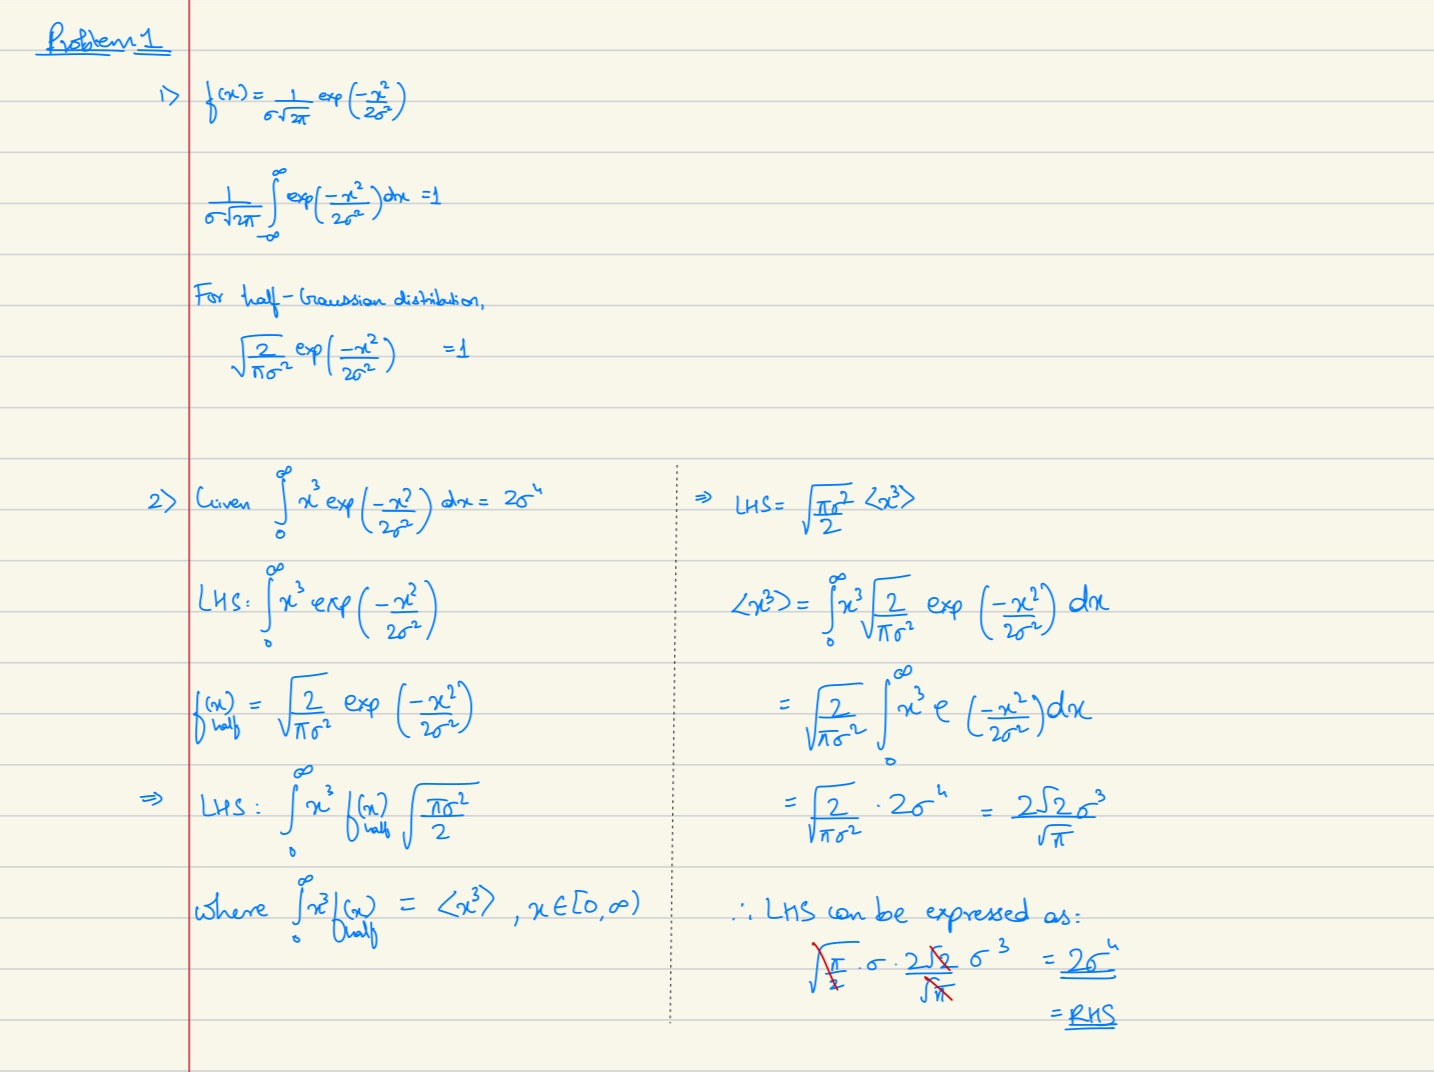

In [183]:
# Question 3

import numpy as np

sigma = 3
N = 10**5
samples = np.random.normal(0, sigma, N)
mask = samples[samples>0]


montecarlo_estimate = np.mean(mask**3)*sigma*np.sqrt(np.pi/2)

# Analytical value
analytical_value = 2 * sigma**4

print("Monte Carlo integral value:",montecarlo_estimate)
print("Analytical integral value:" ,analytical_value)


Monte Carlo integral value: 163.78256290584068
Analytical integral value: 162


In [184]:
# Question 4

N=np.array([100, 1000, 10000])

def mc_estimate(N):
    samp = np.random.normal(0, sigma, N)
    samp = samp[samp>0]
    mc = np.mean(samp**3)*sigma*np.sqrt(np.pi/2)
    return mc
mc_estimate(1000000)

for i in N:
    print("Monte Carlo integral value for N = %d is %f" %(i, mc_estimate(i)))

Monte Carlo integral value for N = 100 is 140.864664
Monte Carlo integral value for N = 1000 is 159.580191
Monte Carlo integral value for N = 10000 is 160.375556


### Solution

## Problem 2

This question is about IQ. It's a flawed and questionable metric, but useful for this problem. By definition, IQ is calibrated as a Gaussian distribution with $\mu=100$ and $\sigma=15$. 

1) Create a `scipy.stats` Gaussian object with these properties. Plot the distribution, and print out 10 random draws, along with the pdf at $x=145$. 

2) Access the `cdf` property of the Gaussian object and plot it over the same $x$-range as in (1) but in a different figure. Access the `ppf` property (percent point function) and use *inverse transform sampling* of the cdf to draw $10^4$ random samples, and make a histogram of these. Overplot the pdf from (1). These should match.

3) What fraction of people have IQ > 145? *Hint: investigate all the properties of the Gaussian object from (1) to find the relevant property that gives you this, or perform a calculation involving the cdf.*

4) What IQ corresponds to "one in a million"?

### Solution

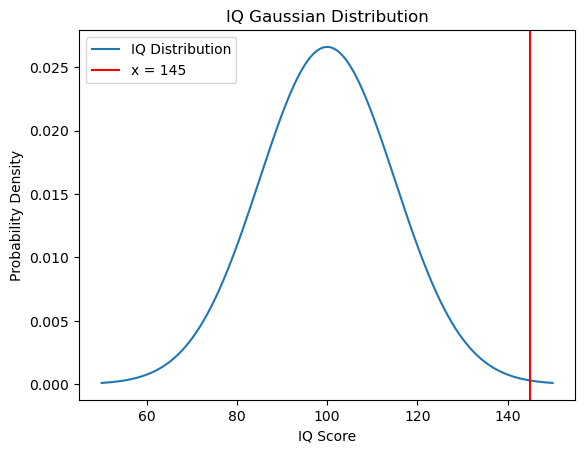

10 Random draws: [ 83.40970337 108.49651108 123.83840009  99.30844263 123.68691334
  94.73043364 105.75737299 104.98111622 109.1749748  116.04594457]
PDF at x = 145: 0.0002954565607958672


In [185]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Question 1

iq_data = stats.norm(loc=100, scale=15)
x = np.linspace(50, 150, 1000) 
y = iq_data.pdf(x) 

# Plot
plt.plot(x, y, label="IQ Distribution")
plt.axvline(145,color='r', label="x = 145")
plt.xlabel("IQ Score")
plt.ylabel("Probability Density")
plt.title("IQ Gaussian Distribution")
plt.legend()
plt.show()


random_draws = iq_data.rvs(10)
print("10 Random draws:", random_draws)

# PDF at x = 145
pdf_145 = iq_data.pdf(145)
print(f"PDF at x = 145:", pdf_145)


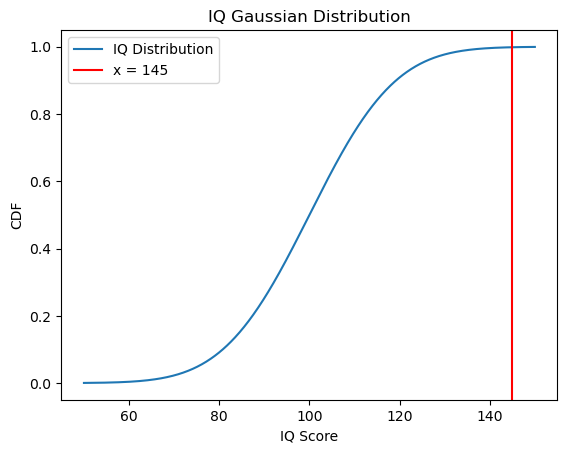

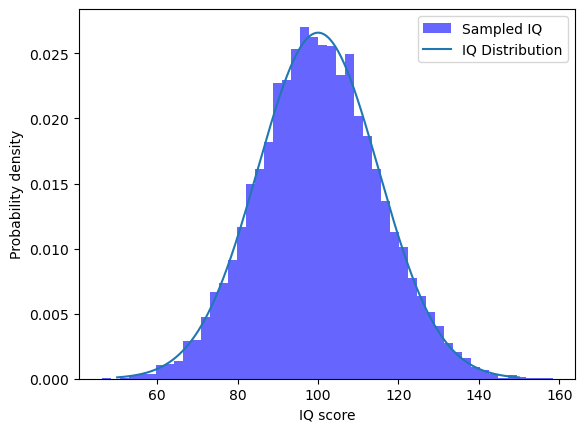

In [186]:
# Question 2

y = iq_data.cdf(x) 

# Plot
plt.plot(x, y, label="IQ Distribution")
plt.axvline(145,color='r', label="x = 145")
plt.xlabel("IQ Score")
plt.ylabel("CDF")
plt.title("IQ Gaussian Distribution")
plt.legend()
plt.show()

#Inverse transform
N = 10**4
sample = np.random.uniform(0, 1, N)
iq_sample = iq_data.ppf(sample)
plt.hist(iq_sample, bins=50, density=True, alpha=0.6, color='b', label="Sampled IQ")
plt.plot(x, iq_data.pdf(x), label="IQ Distribution")
plt.xlabel("IQ score")
plt.ylabel("Probability density")
plt.legend()
plt.show()

In [187]:
# Question 3
print("Fraction of people with IQ > 145 is:", 1-iq_data.cdf(145))


#Question 4
print("The IQ score corresponding to one in a million is:", iq_data.ppf(1-(1e-6)))

Fraction of people with IQ > 145 is: 0.0013498980316301035
The IQ score corresponding to one in a million is: 171.3013646322563


## Problem 3

This question is about Poisson distributions. A famous early application was an analysis of Prussian cavalryman horse-kick deaths by [Bortkiewicz](https://www.wikiwand.com/en/Ladislaus_Bortkiewicz) in 1898. Let's take a short look at the kind of data he analyzed.

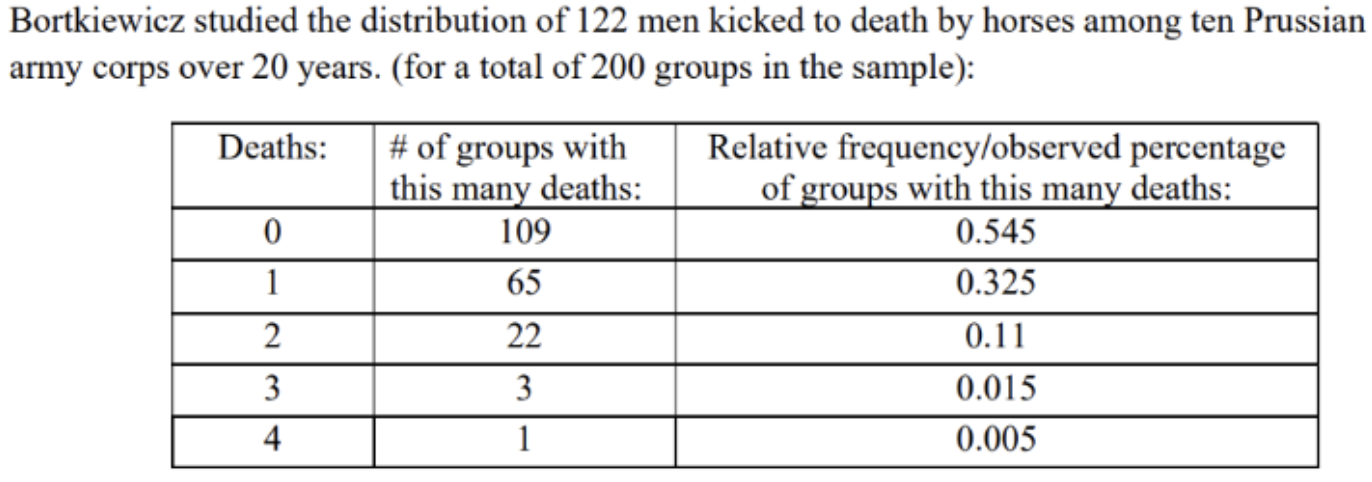

The data essentially consist of 200 total years of Prussian army corps information (i.e. ten army corps over 20 years).

1) Make a plot of the first and third columns of this data.

2) Plot a few Poisson distributions on top that are characterized by different $\mu$ values that might be reasonable guesses for how the data is distributed.

3) We'll come to model fitting next week, but for now use the descriptive sample statistics that you can calculate from this data to deduce the $\mu$ of the modeled Poisson distribution, e.g. the mean, std, median, mode, skewness, and kurtosis, where relevant. Do this however you like, but note that with the data in the table you won't just be able to get a sample mean, since these are tabulated densities, not samples. 

*Hint: use a weighted mean, or alternatively make a dataset that has the numbers 0,1,2,3,4 in agreement with their frequency in the table.*

4) Plot the Poisson distribution with the $\mu$ found in (3) alongside the data.

### Solution

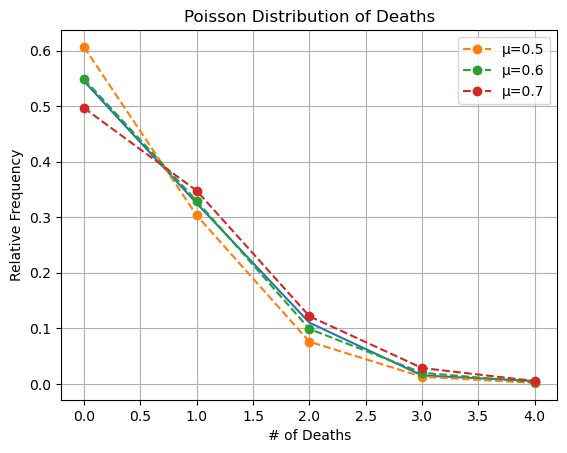

In [188]:
# Question 1 & 2

deaths = np.array([0,1,2,3,4])
frequency = np.array([0.545, 0.325, 0.11, 0.015, 0.005])
plt.plot(deaths, frequency)
plt.xlabel("Deaths")
plt.ylabel("% of groups corresponding to the listed # of deaths")
plt.plot()

mu = np.array([0.5, 0.6, 0.7])
for i in mu_values:
    poisson_probs = stats.poisson.pmf(deaths, i)
    plt.plot(deaths, poisson_probs, marker='o', linestyle='dashed', label=f"μ={i}")


plt.xlabel("# of Deaths")
plt.ylabel("Relative Frequency")
plt.title("Poisson Distribution of Deaths")
plt.legend()
plt.grid()
plt.show()

In [189]:
# Question 3

mean_mu = np.sum(deaths*frequency)
E_x2 = np.sum(deaths**2 * frequency)
sigma2 = E_x2 - mean_mu**2
sigma = np.sqrt(sigma2)


mode = np.floor(mean_mu)
skewness = 1 / np.sqrt(mean_mu)
kurtosis = 1 / mean_mu


print("Mean (μ):", mean_mu)
print("Variance (σ²):", sigma2)
print("Standard Deviation (σ):", sigma)
print("Mode (μ):", mode)
print("Skewness (μ):", skewness)
print("Kurtosis (μ):", kurtosis)

Mean (μ): 0.6100000000000001
Variance (σ²): 0.6078999999999999
Standard Deviation (σ): 0.7796794213008318
Mode (μ): 0.0
Skewness (μ): 1.2803687993289596
Kurtosis (μ): 1.6393442622950818
